## Regressão Linear

A predição por regressão linear é uma abordagem que procura estimar uma reta a partir do relacionamento de duas variáveis ou mais.
Essa relação é representada por uma equação e que a predição é calcuada pela soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

#### Passo 1: Instalar bibliotecas
Este exemplo utiliza a biblioteca scikit-learn, uma das bibliotecas mais populares para machine learning em Python

In [11]:
#!pip install matplotlib
#!pip install numpy
#!pip install scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install json

#### Passo 2: Importar as bibliotecas

Importa as bibliotecas necessárias como numpy para manipulação de arrays, matplotlib para visualização, e scikit-learn para a construção do modelo de regressão linear.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import json
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Passo 3: Gerar dados de exemplo
Criar um conjunto de dados aleatórios para treinar o modelo

In [9]:
diabetes = load_diabetes()
#diabetes
#print(diabetes["DESCR"])

In [10]:
X = diabetes['data']
y = diabetes['target']

In [11]:
print(f"Nomes dos Atributos: {diabetes['feature_names']}")
print(f"Tamanho de X: {X.shape}")
print(f"Tamanho de y: {y.shape}")

Nomes dos Atributos: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Tamanho de X: (442, 10)
Tamanho de y: (442,)


In [12]:
# np.c_ é uma função numpy para concatenar array
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [13]:
correlation = data.corr()
correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

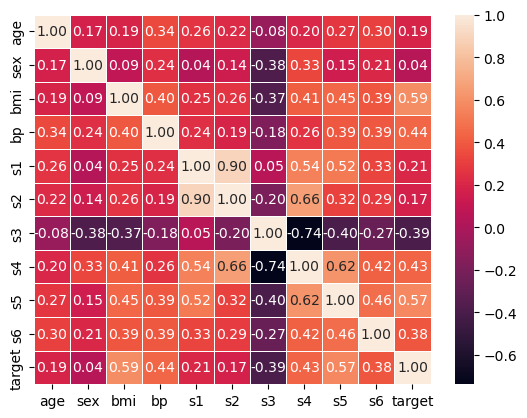

In [14]:
correlation_map = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.4)
correlation_map

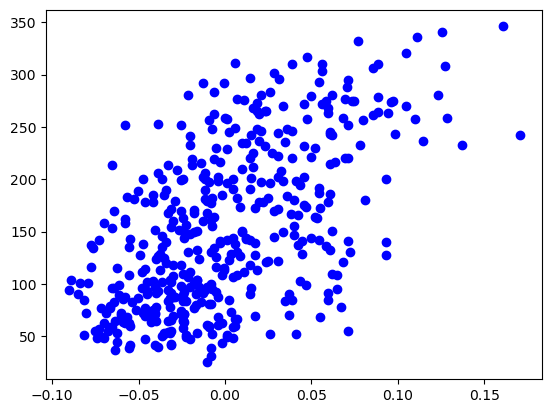

In [16]:
X = np.c_[X[:,2]]
plt.scatter(X, y, color='blue')
plt.show()

#### Passo 4: Dividir os dados em conjuntos de treinamento e teste

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

##### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (353, 1)
Tamanho de X_test: (89, 1)
Tamanho de y_train: (353,)
Tamanho de y_test: (89,)


#### Passo 4: Criar o modelo de regressão linear

Usar o estimador do Scikit-Learn [`sklearn.linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

##### Retorna:
* Objeto `estimator` do Scikit-Learn

In [19]:
model = LinearRegression()

##### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X` - Dados de treinamento
    * `y` - Valores alvo
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

#### Passo 5: Treinar o modelo

In [20]:
model.fit(X_train, y_train)

LinearRegression()

#### Passo 6: Fazer previsões no conjunto de teste

In [21]:
y_pred = model.predict(X_test)

#### Passo 7: Avaliar modelo

Ao treinar um modelo de regressão linear, estamos interessados em obter o valor de $\theta$ que minimize a função de custo.

##### *Mean Squared Error* (MSE) - Erro Quadrático Médio
Uma função de custo tipicamente utilizada em problemas de regressão é o **MSE**:

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

O Erro Quadrático Médio nos informa a que distância a reta de regressão está do conjunto de dados. Calculando o erro (distância entre os pontos e a reta) e elevando ao quadrado (para remover sinais negativos), dando maior peso para grandes erros. A reta com o melhor ajuste possível é a que fornece o menor erro quadrático médio.

##### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
Para encontrar o erro médio absoluto basta somar a distancia dos pontos até a reta e depois dividir pelo mesmo número de pontos

$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

Erro Quadrático Médio (MSE): 4061.8259284949268
Erro Absoluto Médio (MAE): 52.25997644534553
Coeficiente: [998.57768914]
Intercepto: 152.00335421448167


#### Passo 8: Visualizar os resultados

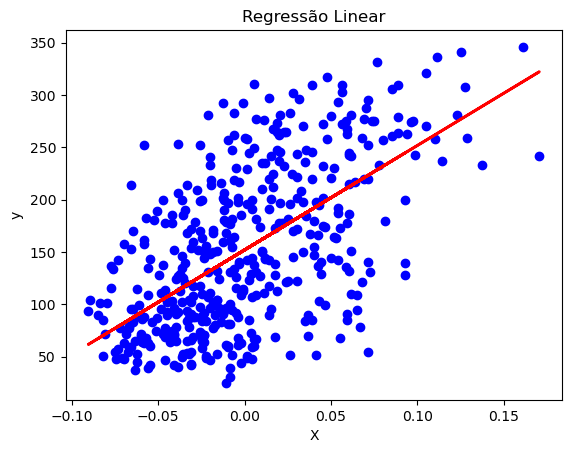

In [23]:
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.show()